Mean Squared Error: 3289822124.813916
R-squared: 0.9807957301066761


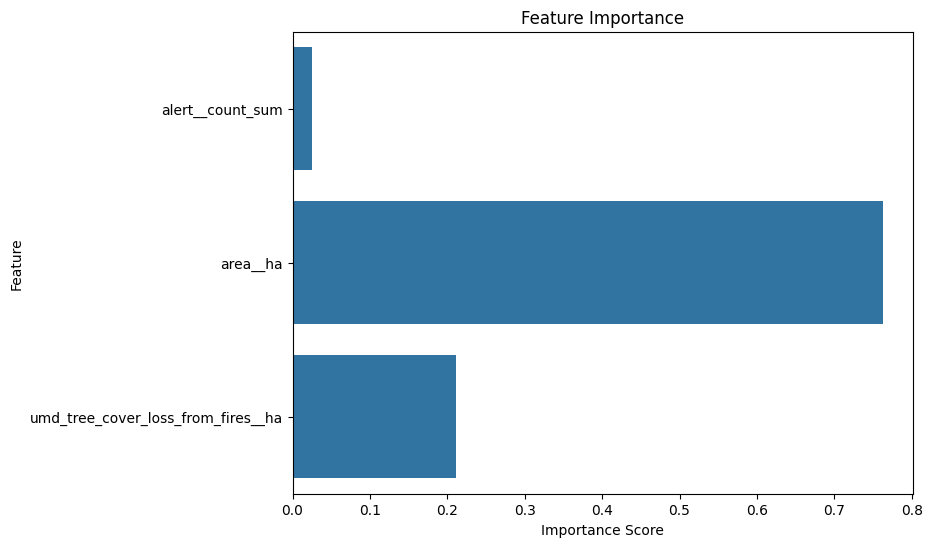

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('/content/cleaned_forest_fire_data_no_missing_names.csv')

X = df[['alert__count_sum', 'area__ha', 'umd_tree_cover_loss_from_fires__ha']]
y = df['umd_tree_cover_loss__ha']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


import matplotlib.pyplot as plt
import seaborn as sns


feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)


plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


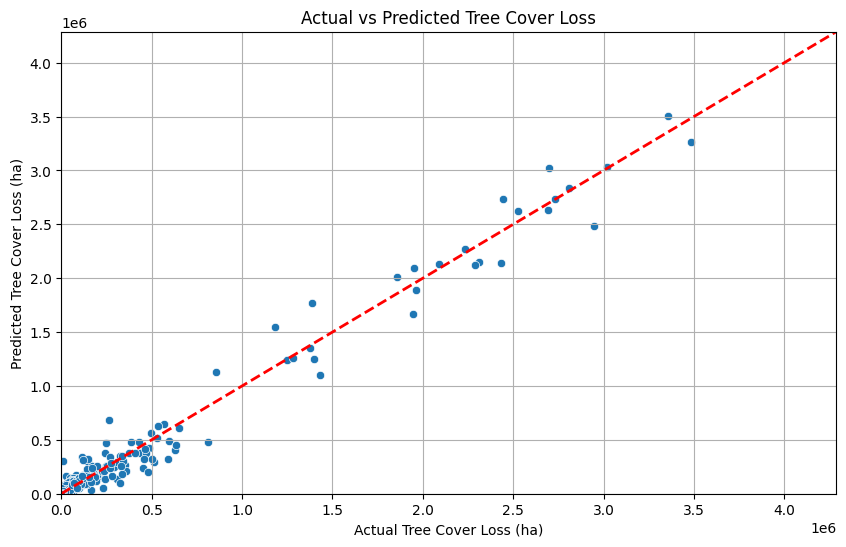

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Tree Cover Loss')
plt.xlabel('Actual Tree Cover Loss (ha)')
plt.ylabel('Predicted Tree Cover Loss (ha)')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()


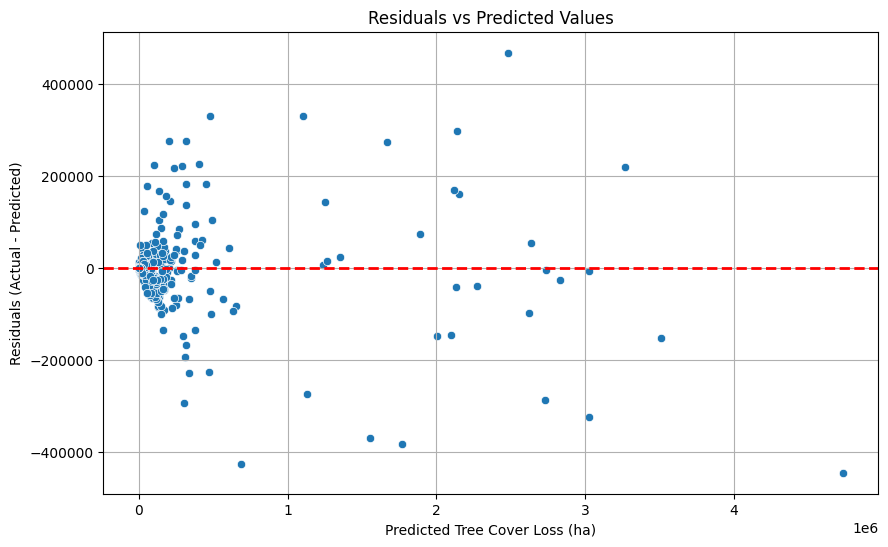

In [ ]:

residuals = y_test - y_pred


plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Tree Cover Loss (ha)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid()
plt.show()


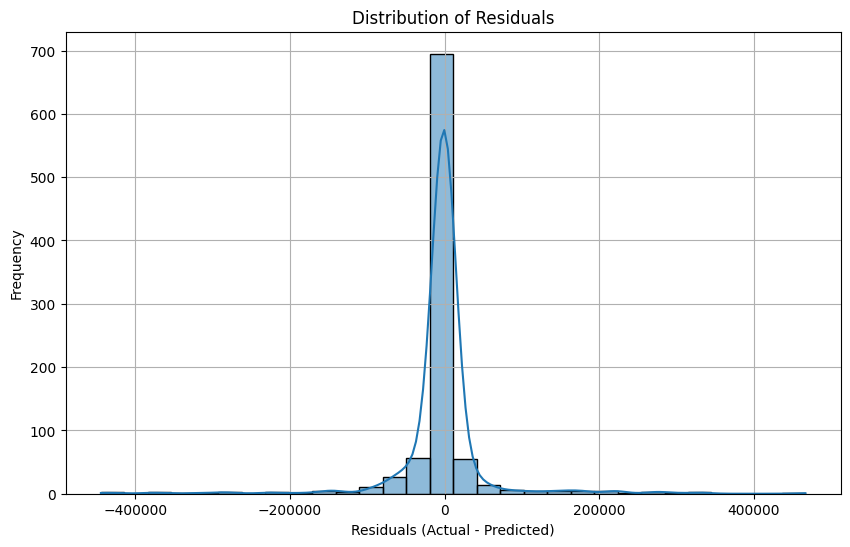

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid()
plt.show()


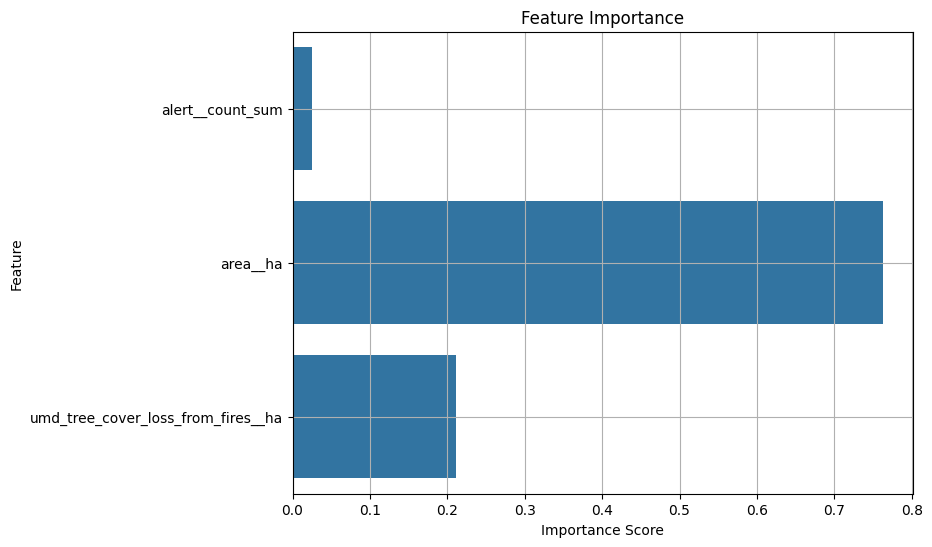

In [ ]:

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)


plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid()
plt.show()


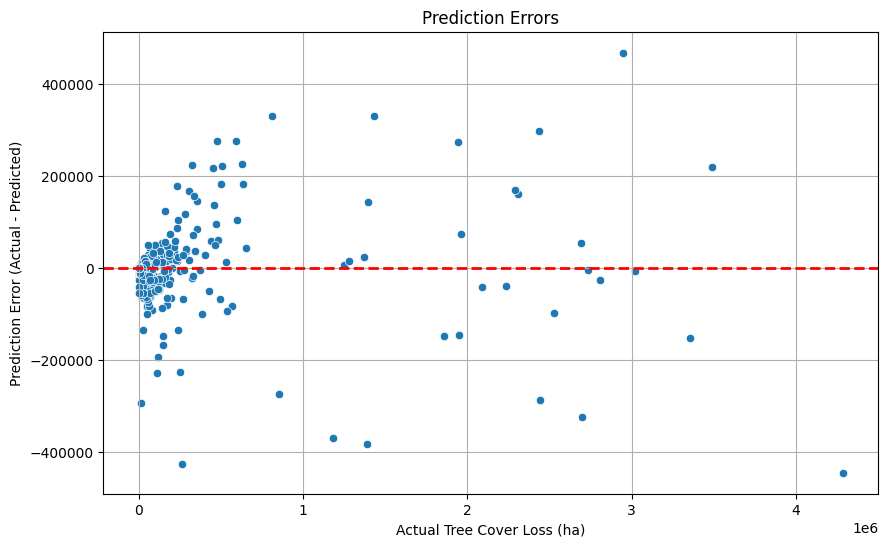

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=(y_test - y_pred))
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title('Prediction Errors')
plt.xlabel('Actual Tree Cover Loss (ha)')
plt.ylabel('Prediction Error (Actual - Predicted)')
plt.grid()
plt.show()


Random Forest Regressor:
Mean Squared Error: 3289822124.813916
R-squared: 0.9807957301066761
Linear Regression:
Mean Squared Error: 39017588373.3627
R-squared: 0.7722356196534317
Gradient Boosting Regressor:
Mean Squared Error: 4821943734.039632
R-squared: 0.9718520013041262
Support Vector Regressor:
Mean Squared Error: 182650537815.2511
R-squared: -0.06621880797377244


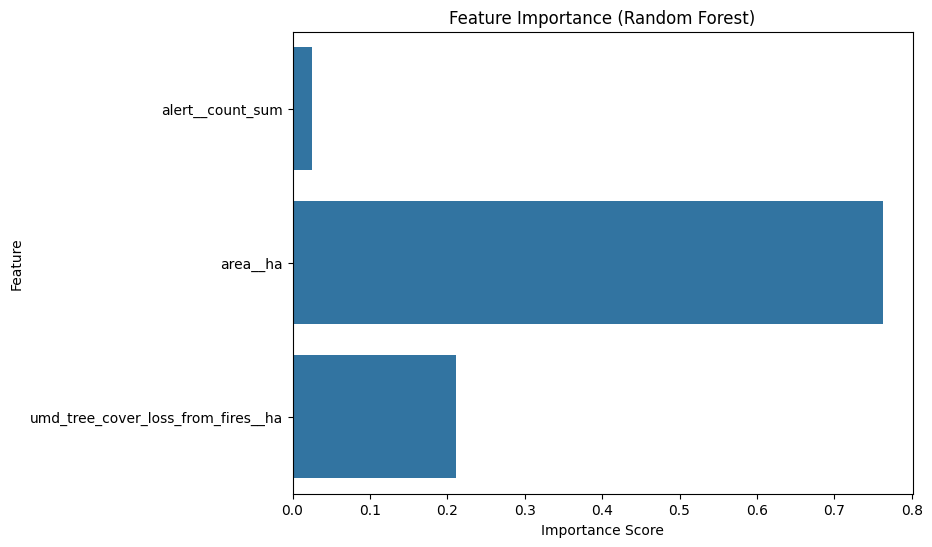

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/cleaned_forest_fire_data_no_missing_names.csv')


X = df[['alert__count_sum', 'area__ha', 'umd_tree_cover_loss_from_fires__ha']]
y = df['umd_tree_cover_loss__ha']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regressor:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression:")
print(f"Mean Squared Error: {mse_lr}")
print(f"R-squared: {r2_lr}")


gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)


mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
print("Gradient Boosting Regressor:")
print(f"Mean Squared Error: {mse_gbr}")
print(f"R-squared: {r2_gbr}")

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)


mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("Support Vector Regressor:")
print(f"Mean Squared Error: {mse_svr}")
print(f"R-squared: {r2_svr}")

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


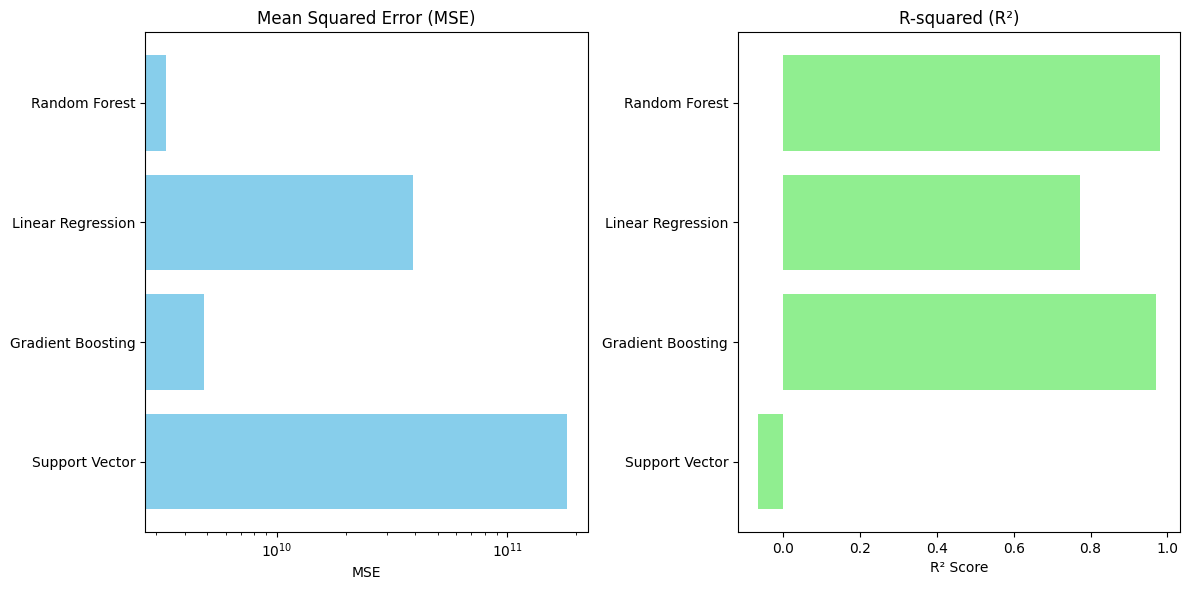

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


models = ['Random Forest', 'Linear Regression', 'Gradient Boosting', 'Support Vector']
mse_values = [3289822124.81, 39017588373.36, 4821943734.04, 182650537815.25]
r2_values = [0.9808, 0.7722, 0.9719, -0.0662]


fig, ax = plt.subplots(1, 2, figsize=(12, 6))


ax[0].barh(models, mse_values, color='skyblue')
ax[0].set_title('Mean Squared Error (MSE)')
ax[0].set_xlabel('MSE')
ax[0].invert_yaxis()
ax[0].set_xscale('log')


ax[1].barh(models, r2_values, color='lightgreen')
ax[1].set_title('R-squared (R²)')
ax[1].set_xlabel('R² Score')
ax[1].invert_yaxis()


plt.tight_layout()
plt.show()
